In [31]:
import pandas as pd
#Importação das bases de dados da web
url_ocorrencias = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia.csv'
url_tipo_ocorrencia = 'https://dedalo.sti.fab.mil.br/dadosabertos/ocorrencia_tipo.csv'
url_aeronaves = 'https://dedalo.sti.fab.mil.br/dadosabertos/aeronave.csv'
url_fator_contribuinte = 'https://dedalo.sti.fab.mil.br/dadosabertos/fator_contribuinte.csv'

#leitura das bases de dados 
ocorrencias_df = pd.read_csv(url_ocorrencias,sep= ';', encoding='latin-1')
tipo_df = pd.read_csv(url_tipo_ocorrencia, sep=';', encoding='latin-1')
aeronaves_df = pd.read_csv(url_aeronaves, sep= ';', encoding='latin-1')
fator_df = pd.read_csv(url_fator_contribuinte, sep=';', encoding='latin-1')


display(ocorrencias_df)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13180,28377,28377,28377,28377,28377,ACIDENTE,***,***,IMPERATRIZ,MA,...,27/01/2007,11:18:00,SIM,FINALIZADA,A-053/CENIPA/2009,SIM,2009-11-16,2,1,NÃO
13181,28375,28375,28375,28375,28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,...,26/01/2007,18:15:00,SIM,FINALIZADA,A-021/CENIPA/2010,SIM,2007-08-15,1,1,NÃO
13182,28355,28355,28355,28355,28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAIÚVA,MG,...,18/01/2007,09:10:00,SIM,FINALIZADA,A-001/CENIPA/2010,SIM,2010-03-19,11,1,NÃO
13183,28335,28335,28335,28335,28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,...,19/01/2007,12:30:00,SIM,FINALIZADA,A-169/CENIPA/2013,SIM,2013-12-16,1,1,NÃO


## Tarefa 1: Análise Temporal e Geográfica

### 1. Mês mais perigoso: Calcule e plote um gráfico de barras que mostre o total de ocorrências por mês do ano. Identifique o mês com o maior número de ocorrências.

Locale definido para 'Portuguese_Brazil'.
O mês com maior número de acidentes é: janeiro


(<Axes: title={'center': 'Ocorrencia de acidentes por mês'}, xlabel='Meses', ylabel='Quantidade'>,
 None)

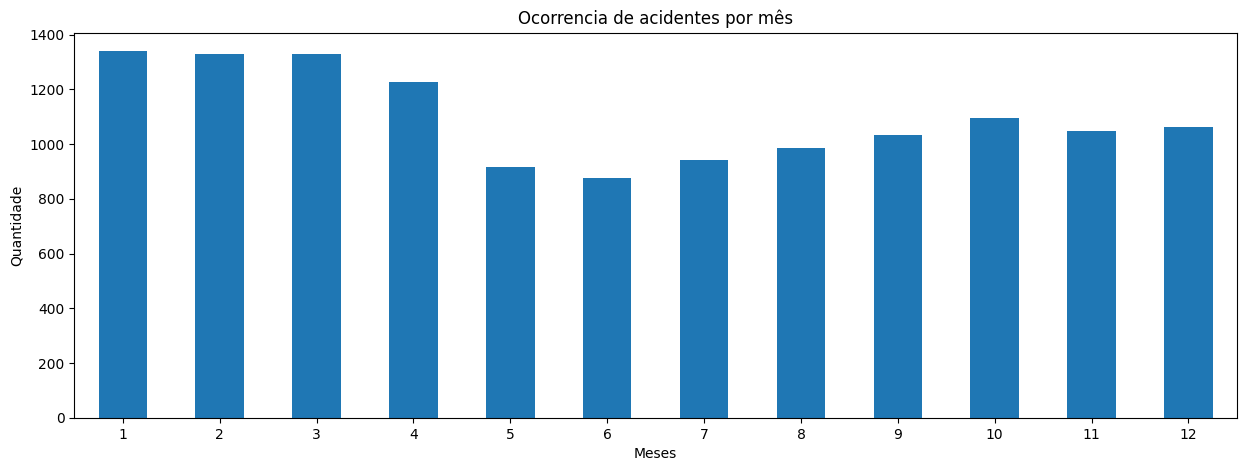

In [63]:
import locale
try:
    locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil')
    print("Locale definido para 'Portuguese_Brazil'.")
except locale.Error:
    print("Locale 'Portuguese_Brazil' não encontrado. Tentando 'pt_BR.utf8'...")
ocorrencias_df['ocorrencia_dia'] = pd.to_datetime(ocorrencias_df['ocorrencia_dia'],format = '%d/%m/%Y')
from datetime import date
def mes_mais_perigoso(df):
    combinado_df = df[['ocorrencia_dia']]
    combinado_df = combinado_df.groupby(combinado_df['ocorrencia_dia'].dt.month)['ocorrencia_dia'].count()
    mes = combinado_df.idxmax()
    nome_mes = date(2000,mes,1)
    mes_portugues = nome_mes.strftime('%B')
    return combinado_df.plot(figsize=[15,5], kind='bar', title='Ocorrencia de acidentes por mês', xlabel='Meses', ylabel='Quantidade', rot=0), print(f'O mês com maior número de acidentes é: {mes_portugues}')


mes_mais_perigoso(ocorrencias_df)